### Data analysis project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [3]:
### user_tag tells for each user problems solved from each tag and how much time it took him to reach pupil,specialist
### expert... etc

In [4]:
###contests is all contests on codeforces

In [5]:
###problemsWithSolved tells for each problem (rating,tag,number Of Solves For People Above Grandmaster)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
### I've made sure while making this data that it is clean

In [8]:
### DataFrame with information about user subimissions and ranks
user_tag = pd.read_csv('user_tag.csv',index_col='handle').copy().drop('tourist')
### In our analysis we will include only users with more than 1000 problems
user_tag = user_tag[user_tag['all'] > 1000]
print(user_tag.select_dtypes(include='number').columns)
print(user_tag.select_dtypes(include='object').columns)

Index(['rating', 'maxRating', 'regTime', 'schedules', 'two pointers',
       'constructive algorithms', 'geometry', 'matrices', 'sortings', 'math',
       'ternary search', 'graph matchings', 'data structures', 'trees',
       'strings', 'bitmasks', 'graphs', 'greedy', 'hashing',
       'meet-in-the-middle', 'implementation', 'binary search',
       'chinese remainder theorem', 'divide and conquer', 'flows',
       'probabilities', 'dp', '2-sat', 'expression parsing',
       'string suffix structures', 'dsu', 'fft', 'dfs and similar',
       'brute force', 'games', 'interactive', 'combinatorics', 'number theory',
       'shortest paths', 'all', 'pupil', 'spe', 'exp', 'cm', 'm', 'im', 'gm',
       'igm'],
      dtype='object')
Index([], dtype='object')


In [9]:
### DataFrame with information about users who are master
users = pd.read_csv('user2100.csv',index_col='handle').copy().drop('tourist')
users = users.loc[user_tag.index,:]
print(users.select_dtypes(include='number').columns)
print(users.select_dtypes(include='object').columns)

Index(['lstOnline', 'rating', 'friendOf', 'maxRating', 'regTime'], dtype='object')
Index(['lastName', 'country', 'city', 'firstName', 'organization', 'rank',
       'maxRank'],
      dtype='object')


In [10]:
### DataFrame with rating and solve count of all problems
probs = pd.read_csv('problemsWithSolved.csv',index_col=['contestId','index']).copy() ### rate >= 2000
probs.drop(columns=['tags'],inplace=True)
print(probs.select_dtypes(include='number').columns)
print(probs.select_dtypes(include='object').columns)

Index(['rating', 'solved'], dtype='object')
Index(['name'], dtype='object')


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, jiangly to Dukkha
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lastName      1353 non-null   object
 1   country       1745 non-null   object
 2   lstOnline     1931 non-null   int64 
 3   city          1416 non-null   object
 4   rating        1931 non-null   int64 
 5   friendOf      1931 non-null   int64 
 6   firstName     1401 non-null   object
 7   organization  1524 non-null   object
 8   rank          1931 non-null   object
 9   maxRating     1931 non-null   int64 
 10  regTime       1931 non-null   int64 
 11  maxRank       1931 non-null   object
dtypes: int64(5), object(7)
memory usage: 196.1+ KB


In [12]:
user_tag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1931 entries, jiangly to Dukkha
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rating                     1931 non-null   int64  
 1   maxRating                  1931 non-null   int64  
 2   regTime                    1931 non-null   int64  
 3   schedules                  1931 non-null   int64  
 4   two pointers               1931 non-null   int64  
 5   constructive algorithms    1931 non-null   int64  
 6   geometry                   1931 non-null   int64  
 7   matrices                   1931 non-null   int64  
 8   sortings                   1931 non-null   int64  
 9   math                       1931 non-null   int64  
 10  ternary search             1931 non-null   int64  
 11  graph matchings            1931 non-null   int64  
 12  data structures            1931 non-null   int64  
 13  trees                      1931 non-null   in

In [13]:
probs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9671 entries, (np.int64(2035), 'H') to (np.int64(1), 'A')
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    9671 non-null   object 
 1   rating  9671 non-null   float64
 2   solved  9671 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 336.0+ KB


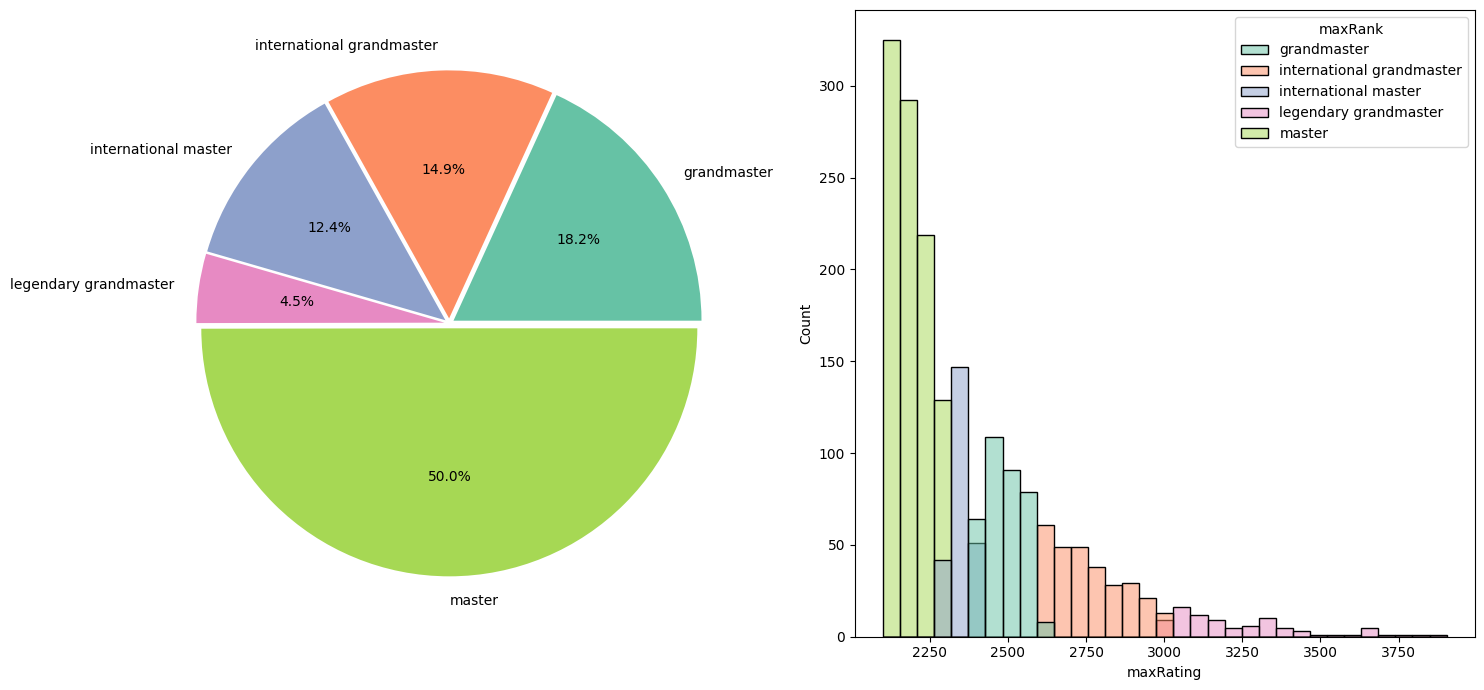

In [14]:
### Distribution for our data

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
df = users.maxRank.value_counts().sort_index()
plt.pie(df.values,autopct='%1.1f%%',labels=df.index,colors=sns.color_palette('Set2'),
        explode=[0.02 for i in range(df.size)])


plt.subplot(1,2,2)
#sns.barplot(x=df.index,y=df.values,color='orange')
sns.histplot(x=users.sort_values(by='maxRank')['maxRating'],hue=users.sort_values(by='maxRank')['maxRank'],palette='Set2')

plt.tight_layout()

plt.show()

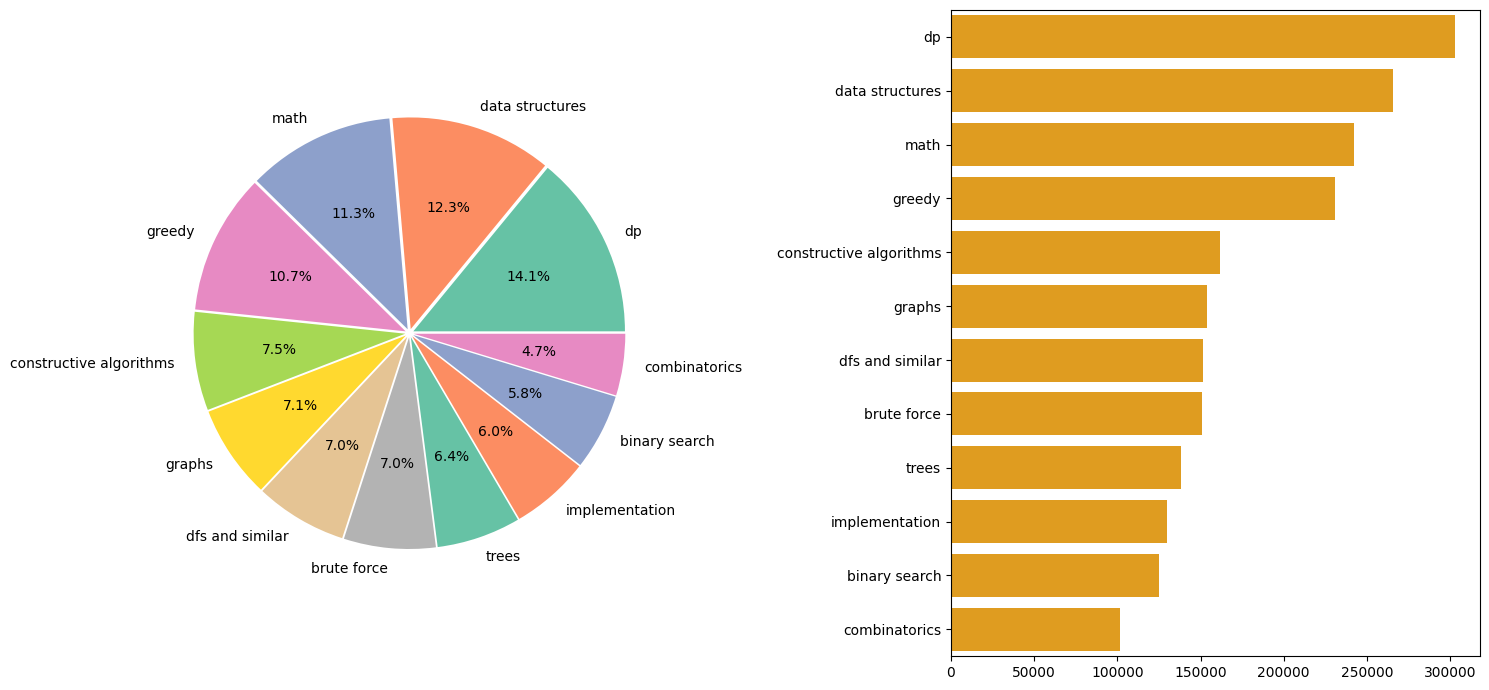

In [15]:
### Top 12 tags solved by masters or above
top_12 = user_tag.loc[:,'schedules':'shortest paths'].sum().sort_values(ascending=False)[:12]
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie(x=top_12.values,labels=top_12.index,
        autopct='%1.1f%%',colors=sns.color_palette('Set2'),
        explode=[0.02 for i in range(top_12.size)])

plt.subplot(1,2,2)
sns.barplot(y=top_12.index,x=top_12.values,orient='h',color='orange')
plt.ylabel(' ')
top_12 = top_12.index.to_list()
plt.tight_layout()
plt.show()
### Show rating for lessest tags (more ratings for these ones)

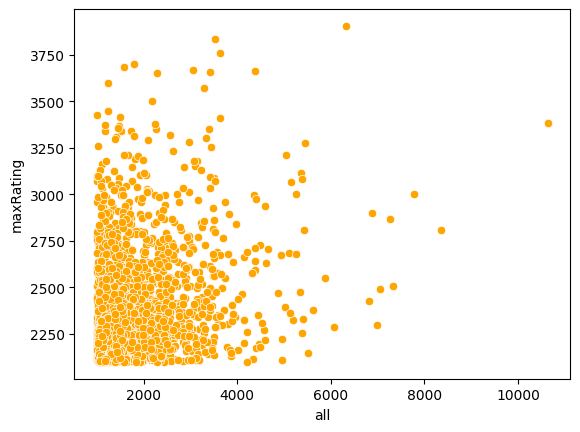

In [16]:
sns.scatterplot(y=user_tag['maxRating'],x=user_tag['all'],color='orange')
plt.show()
### This plot tells as that most people solve around 2000 ro 4000 problems


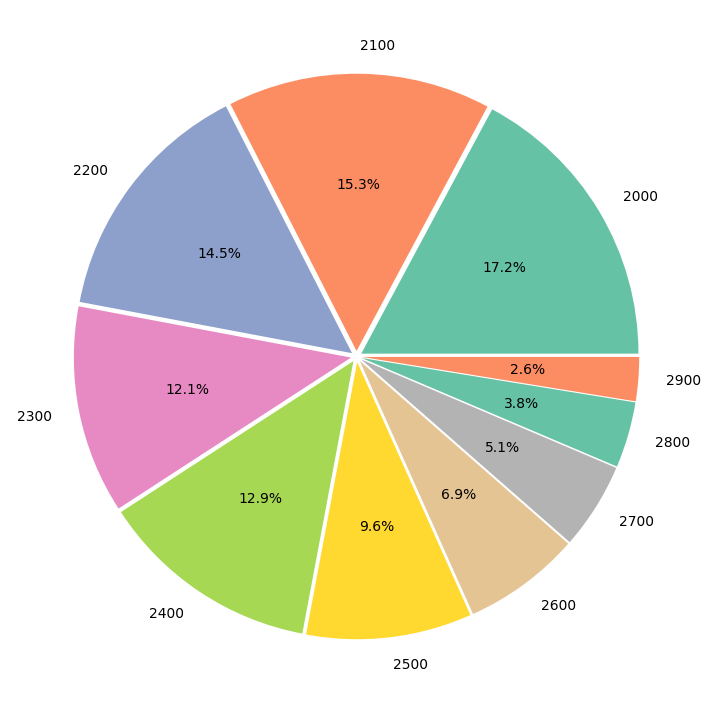

In [17]:
###Distribution for problems
df = probs[probs.rating >= 2000].groupby('rating')['solved'].sum()
df = df[df > 27000]
plt.figure(figsize=(16,9))
plt.pie(x=df,labels=df.index.astype('int'),autopct='%1.1f%%',explode=[0.02 for i in range(len(df))],
        colors=sns.color_palette('Set2'))
plt.show()
### ignore this one :)

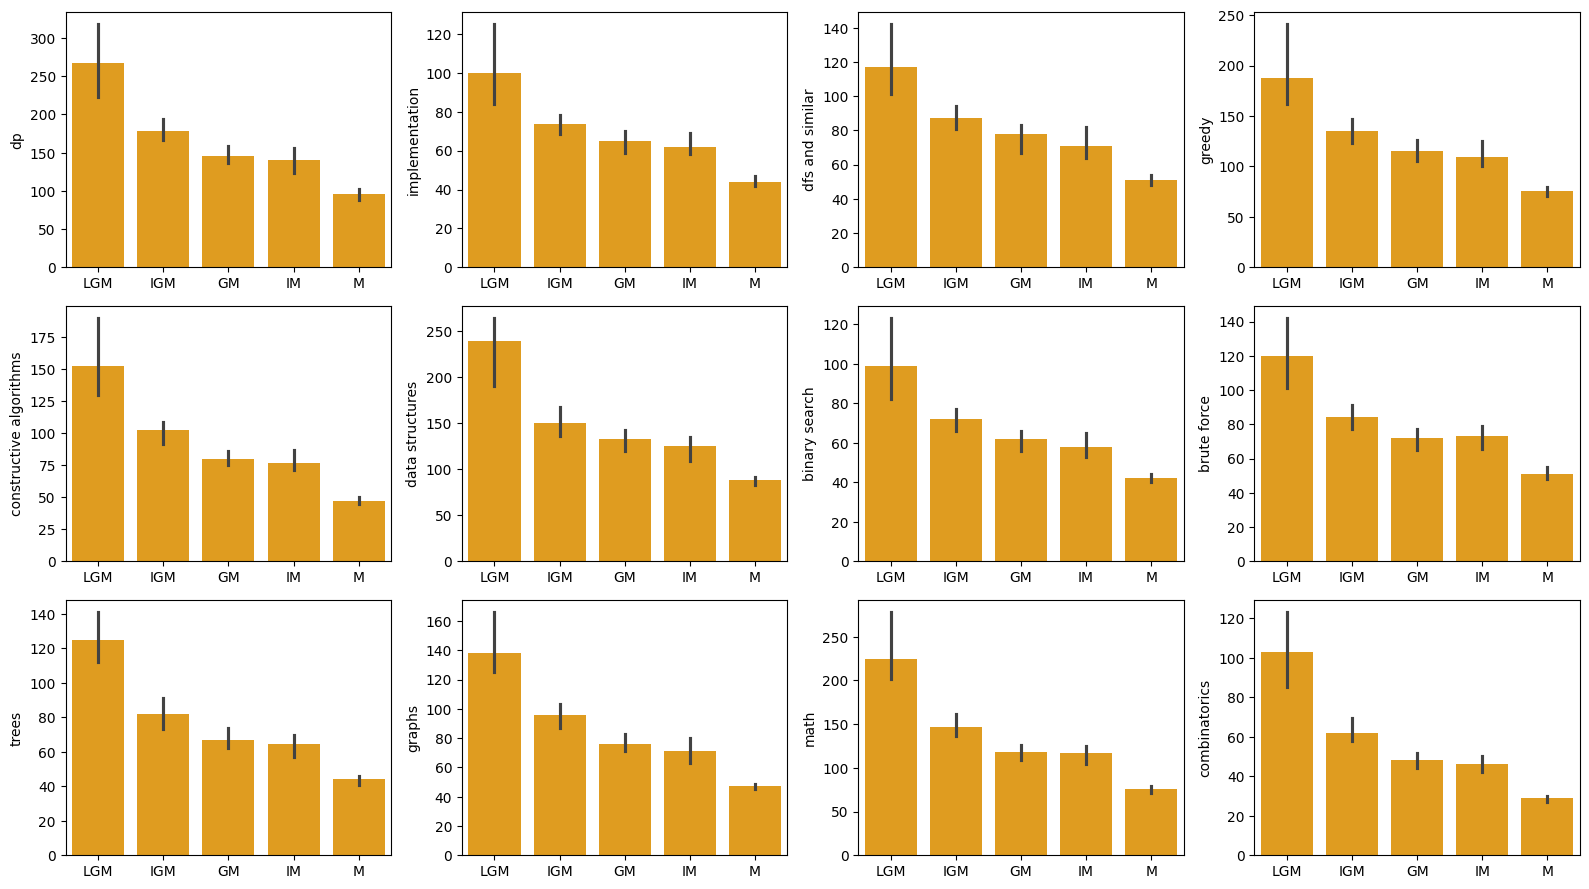

In [26]:
## Problems needed from each topic for each rank
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(16,9))
for i,tag in list(zip(list(zip([0,1,2]*4,[0,1,2,3]*3)),top_12)):
    g = sns.barplot(y=user_tag.loc[:,tag],x=users.maxRank,ax=axes[i],color='orange',estimator='median')
    plt.sca(axes[i])
    plt.xlabel('')
    g.set(xticklabels = ['LGM','IGM','GM','IM','M'])
fig.tight_layout()
plt.show()
### for example if you want to reach LGM you should have about 250 dp problems each of which has rating >= 2000

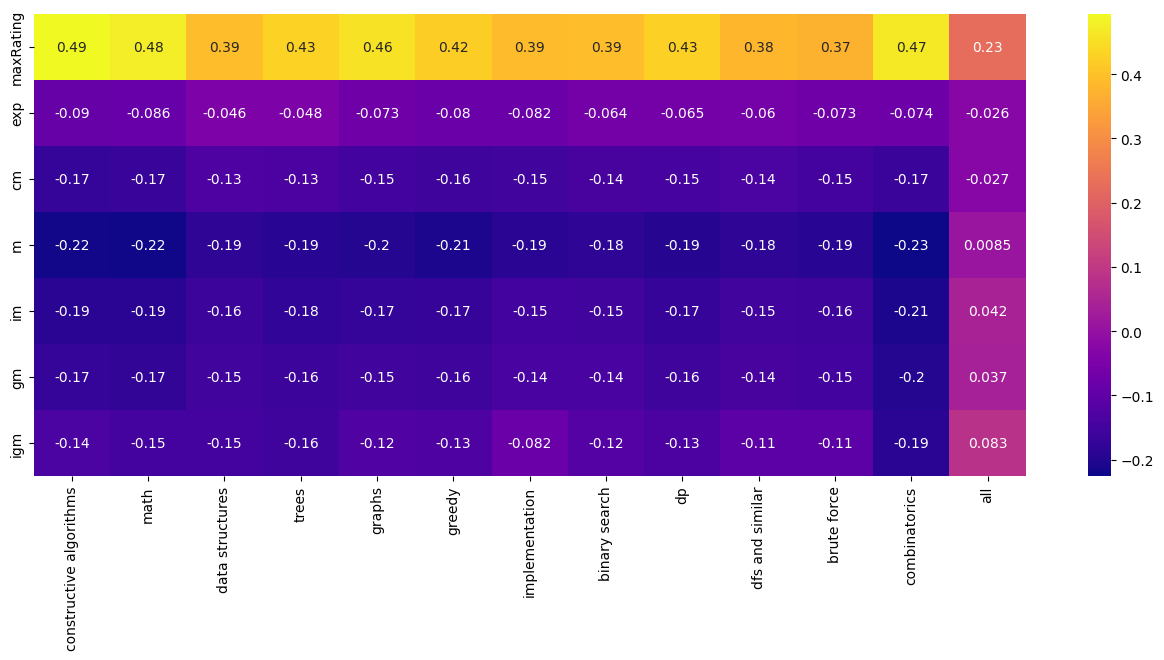

In [19]:
### Correlation between tags and ranks
### we want negative correlation
plt.figure(figsize=(16,6))
all_tags = user_tag.head(1).loc[:,'schedules':'shortest paths'].columns.to_list()
for tag in top_12:
    all_tags.remove(tag)
sns.heatmap(data=user_tag.drop(columns=all_tags+['pupil','spe']).corr(numeric_only=True).drop(['rating','regTime','all']+top_12).drop(
    columns=['regTime','exp','cm','m','im','gm','igm','rating','maxRating'])
            ,cmap='plasma',annot=True)

plt.show()
### ignore this one
### this one tells that combinatorics is important to get higher ranks

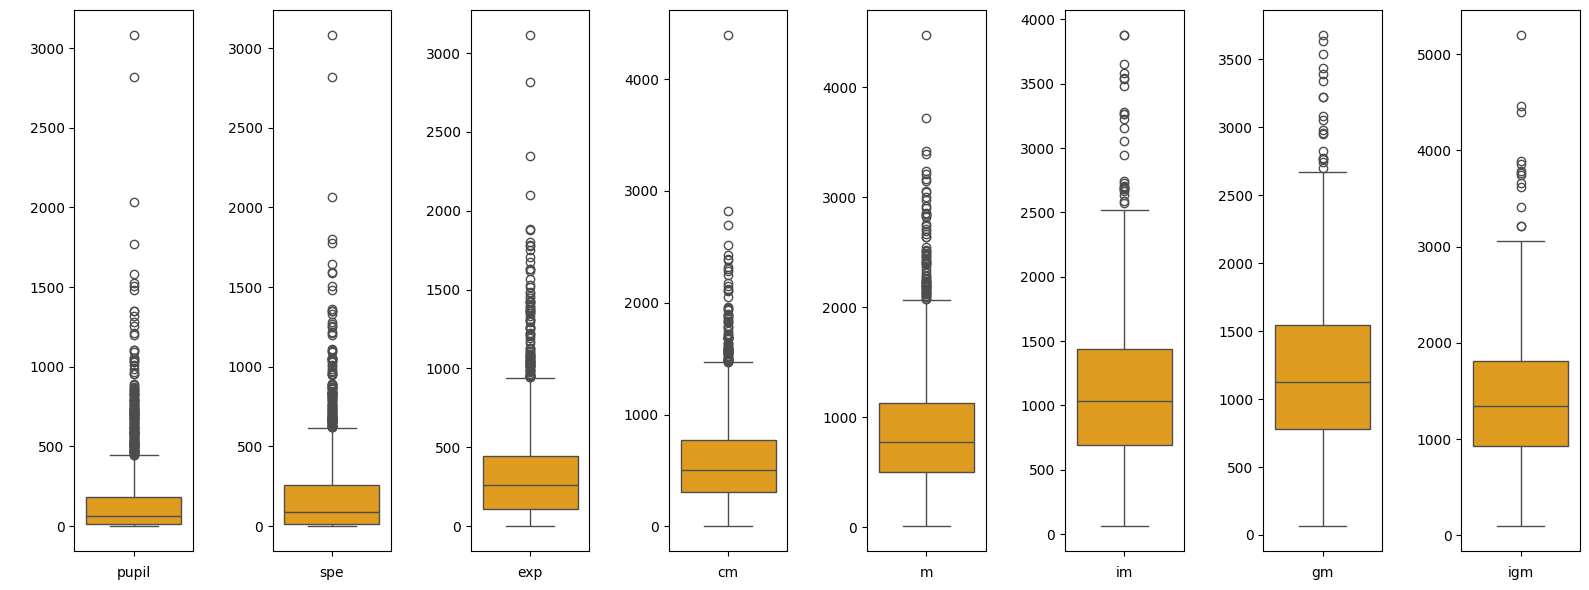

In [20]:
###Days taken to reach each rank
### this is called box plot
ranks = user_tag.head(1).loc[:,'pupil':'igm'].columns.to_list()
plt.figure(figsize=(16,6))
for i,rank in enumerate(ranks):
    plt.subplot(1,8,i+1)
    plt.xlabel(rank)
    plt.ylabel(' ')
    sns.boxplot(y=user_tag[rank],color='orange')
    plt.tight_layout()
plt.show()

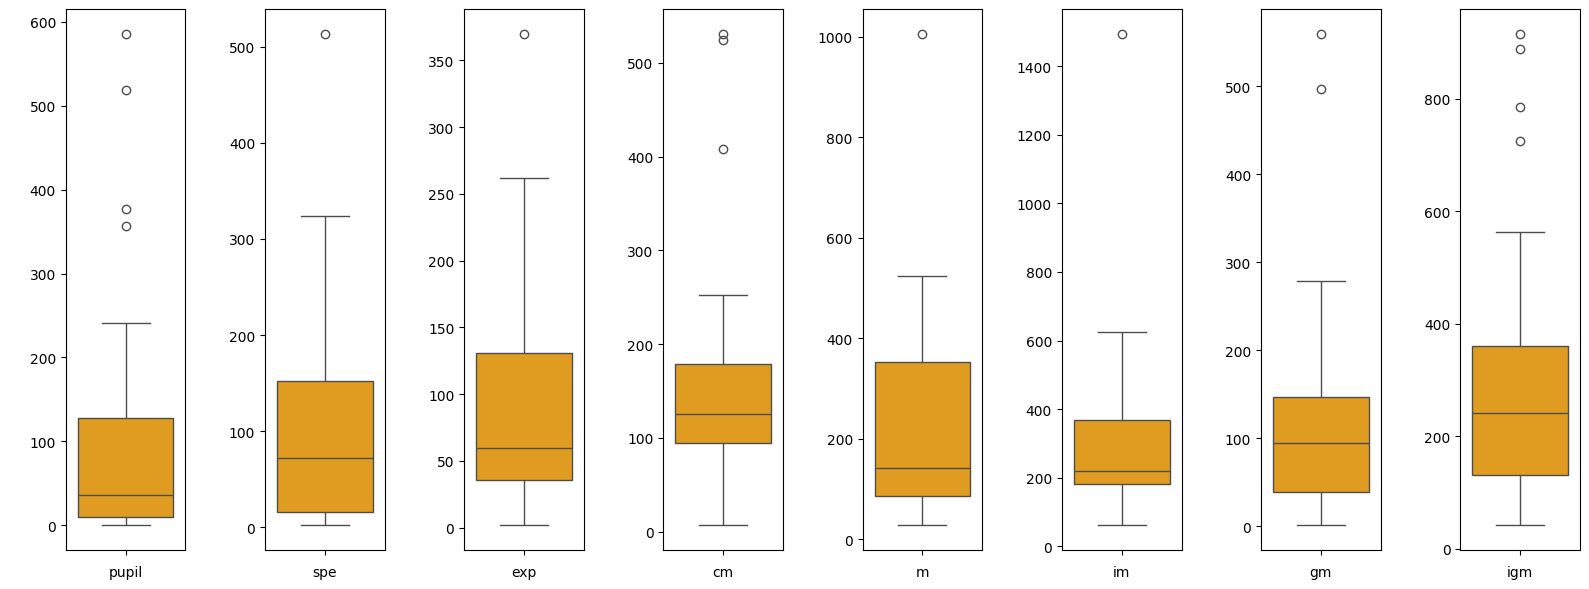

In [21]:
### Days taken from previuos rank
modified_user_tag = user_tag.copy()
ranks = user_tag.head(1).loc[:,'pupil':'igm'].columns.to_list()
for i in range(len(ranks)-1,0,-1):
    modified_user_tag[ranks[i]] -= modified_user_tag[ranks[i-1]]
    modified_user_tag = modified_user_tag[modified_user_tag[ranks[i]] > 0]
plt.figure(figsize=(16,6))
for i,rank in enumerate(ranks):
    plt.subplot(1,8,i+1)
    plt.xlabel(rank)
    plt.ylabel(' ')
    sns.boxplot(y=modified_user_tag[rank],color='orange')
    plt.tight_layout()
plt.show()
###For example people take averagely 100 days to reach gm from im

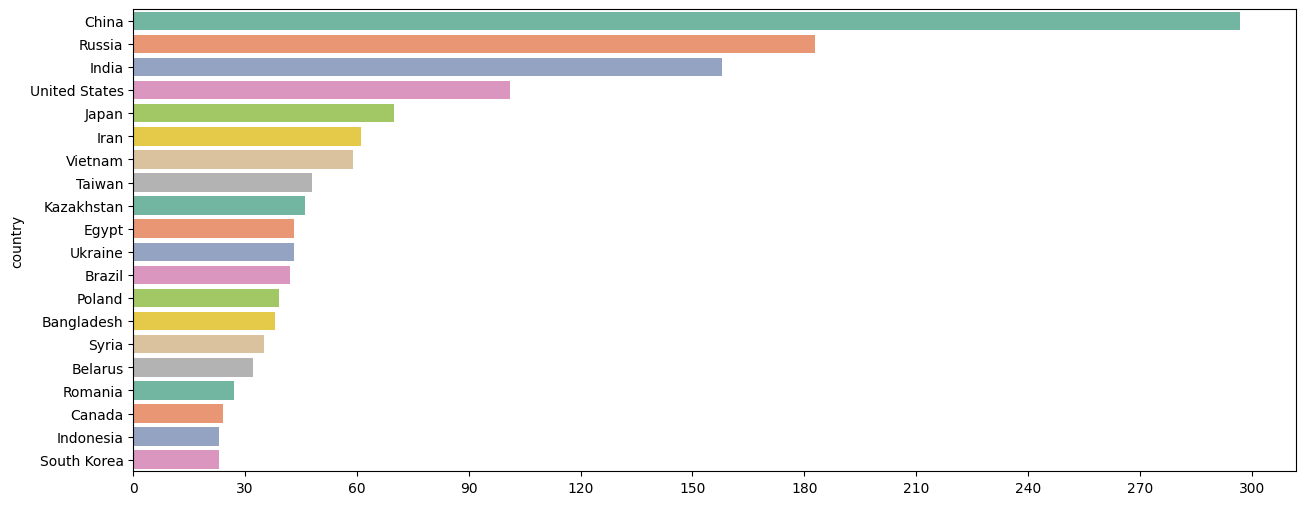

In [57]:
###Top Countries with masters
plt.figure(figsize=(15,6))
masters = users['country'].value_counts()[0:20]
sns.barplot(y=masters.index,x=masters.values,orient='h',palette='Set2')
#plt.title('Top 20 Countries with users having maxRank as Grandmaster')
plt.xticks(np.arange(0,301,30))
plt.show()

### In syria we have a problem of grandmastering

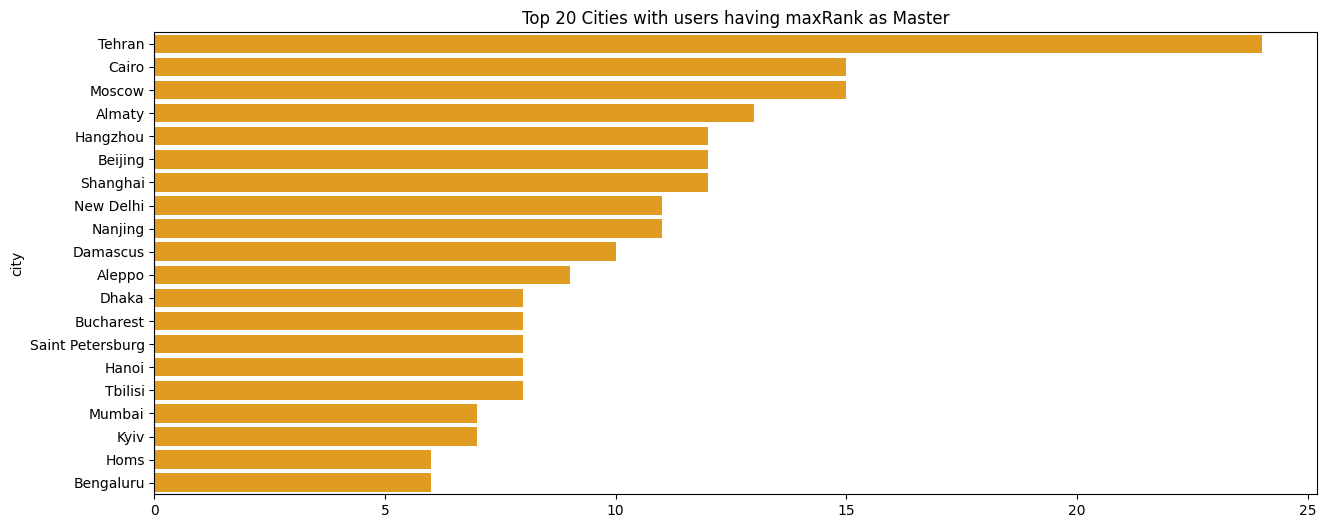

In [23]:
###Top Cities with masters
plt.figure(figsize=(15,6))
masters = users[users.maxRating < 2300]['city'].value_counts()[0:20]
sns.barplot(y=masters.index,x=masters.values,orient='h',color='orange')
plt.title('Top 20 Cities with users having maxRank as Master')
plt.xticks(np.arange(0,30,5))
plt.show()

### In syria we have a problem of grandmastering

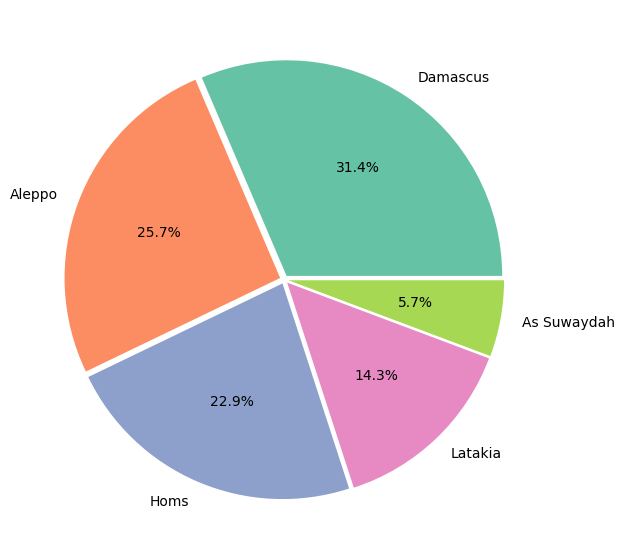

In [24]:
### Users distribution across Syria
Syria = users[users.country == 'Syria']
plt.figure(figsize=(10,7))
Syria = Syria['city'].value_counts()
sz = len(Syria)
plt.pie(Syria,labels=Syria.index,autopct='%1.1f%%'
        ,colors=sns.color_palette('Set2'),explode=[0.02 for i in range(sz)] )
plt.show()

### End

In [ ]:
### This data only deals with users who have reached master at least once
### same thing for problems, problems are counted for solves only from the users who have reached master
### I have stored submissions for every user :)
### I have stored every rating change
### These where python files that dealt with api to fetch data
### I could've done more but I ran out of time
### Seekers of greatness to ICPC 2026